# Churn Prediction

### Importing libraries

In [1]:
import numpy as np
import pandas as pd                  #Importion of libraires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Churn_Modelling.csv") #Load dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info() #data information is diplayed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# To generate descriptive statistics
df.describe() #it describes data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data Preprocessing

In [5]:
df.isnull().sum() #it shows null value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.replace(" ", np.nan, inplace=True) #if blanks space it will replace with nan value

In [7]:
df.isnull().sum() #shows null value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(['Surname'], axis = 1,inplace=True) # as its of no use
df.drop(['RowNumber'], axis = 1,inplace=True)

C:\Users\hntbk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

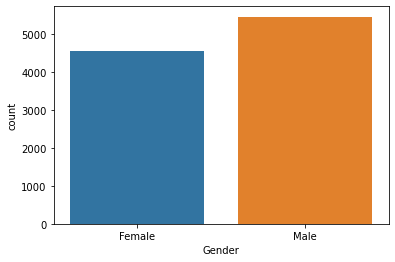

In [9]:
sns.countplot(df["Gender"]) #bar graph for gender

C:\Users\hntbk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age')

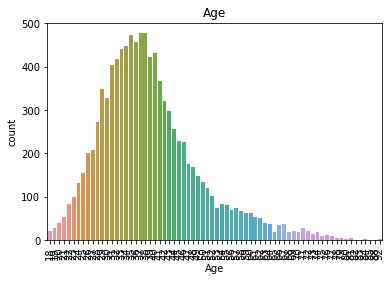

In [10]:
sns.countplot(df["Age"])
plt.xticks(rotation=90) #it rotates value of x axis by 90 degrees 
plt.title("Age") #it is used to title the graph

C:\Users\hntbk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


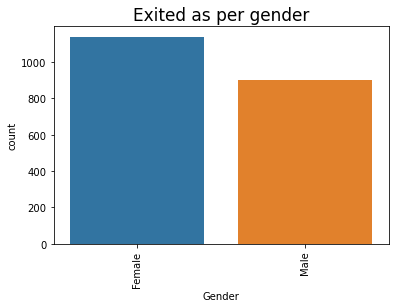

In [11]:
sns.countplot(df['Gender'][df['Exited']==1], data=df) #to show which gender exited the banks services
plt.title("Exited as per gender", fontsize=17)
plt.xticks(rotation=90)
plt.show()

In [12]:
temp = pd.DataFrame({'Geography': df['Geography']}) #it is seprating geography
Geography = temp.value_counts()
Geography


Geography
France       5014
Germany      2509
Spain        2477
dtype: int64

In [13]:
labels= [X[0] for X in Geography.keys()] #getting lables from geography
labels

['France', 'Germany', 'Spain']

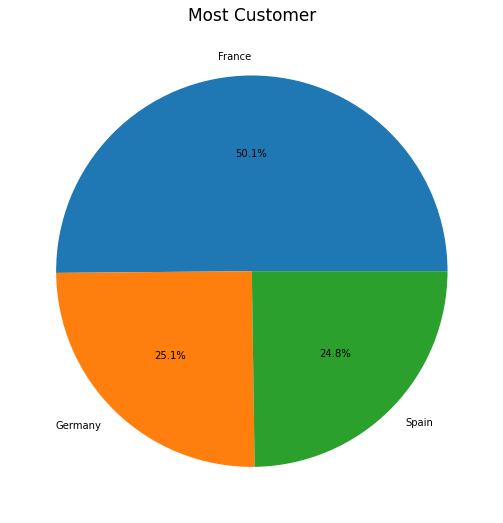

In [14]:
bar , ax = plt.subplots(figsize=(18,9))#pie chart for highest number customer as per geographical area
ax = plt.pie( x = Geography,autopct = "%.1f%%", labels=labels)
plt.title('Most Customer',fontsize = 17)
plt.show()

C:\Users\hntbk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

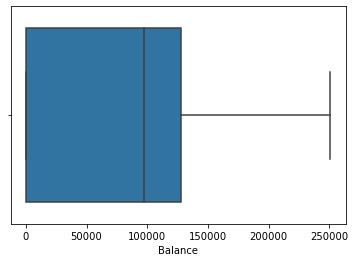

In [15]:
sns.boxplot(df["Balance"])#check for outliers

C:\Users\hntbk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

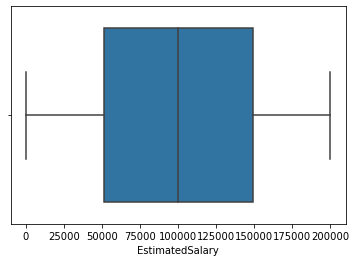

In [16]:
sns.boxplot(df["EstimatedSalary"])#check for outliers

In [17]:
df["Exited"].value_counts()#it is calculating count

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder 

lb_make = LabelEncoder() #it helps to convert string value in numeric
#here we converted geography and gender in numeric value
df['Geography'] = lb_make.fit_transform(df['Geography'])
df['Gender'] = lb_make.fit_transform(df['Gender'])

In [19]:
df.astype(int) #it converts into integer

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0,1,1,1,101348,1
1,15647311,608,2,0,41,1,83807,1,0,1,112542,0
2,15619304,502,0,0,42,8,159660,3,1,0,113931,1
3,15701354,699,0,0,39,1,0,2,0,0,93826,0
4,15737888,850,2,0,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0,2,1,0,96270,0
9996,15569892,516,0,1,35,10,57369,1,1,1,101699,0
9997,15584532,709,0,0,36,7,0,1,0,1,42085,1
9998,15682355,772,1,1,42,3,75075,2,1,0,92888,1


### Select Training data, test data 

In [20]:
#splitting the variables as independent and dependent
cols=['Exited']

X = df.drop(cols, axis = 1) # independent variabes
#X = df.drop(['target'], axis = 1)
y = df['Exited'] # dependent variable

### Feature impotance

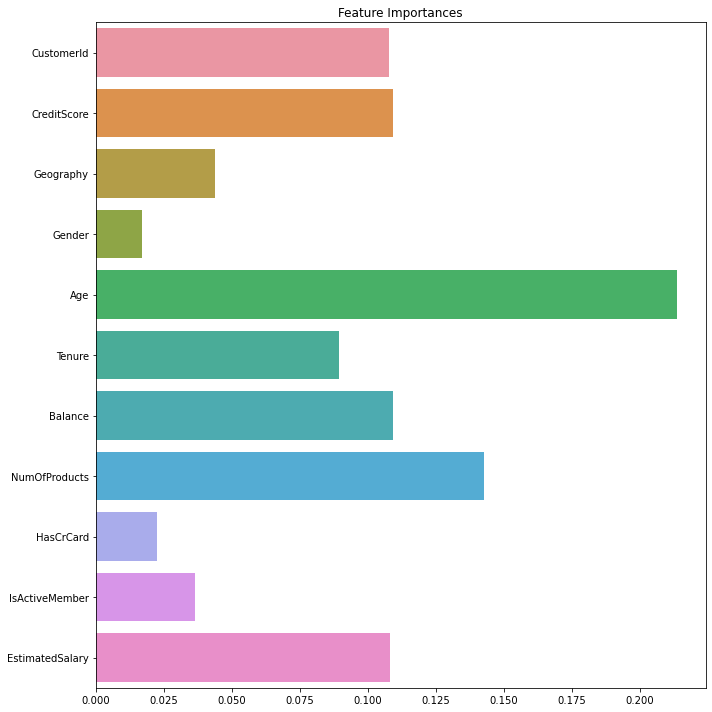

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
featimp = ExtraTreesClassifier()

# Training the model
featimp.fit(X,y)

# Computing the importance of each feature
featimp.feature_importances_

# Plotting a Bar Graph to compare 
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=featimp.feature_importances_, y=X.columns).set(title="Feature Importances")
plt.tight_layout()
plt.savefig("Visualizations/feature_importances.pdf", dpi=120)

### Feature Selection

In [22]:
# Taking only important features
new_df=df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]
new_df

,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1


In [23]:
### Select Training data, test data after feature selection
X_1= new_df.drop('Exited', axis = 1)
y_1 = new_df['Exited']

In [24]:
from sklearn.model_selection import train_test_split #to split data in 80-20

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.20, random_state=10)#testing ke liye unknown data 20 % rakhna hai 
#random_state is used to get same data everytime when run
#we can give any value in random state

In [25]:
# For scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Training model

In [26]:
# LogisticRegression
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1578
           1       0.62      0.15      0.24       422

    accuracy                           0.80      2000
   macro avg       0.72      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000

0.8015


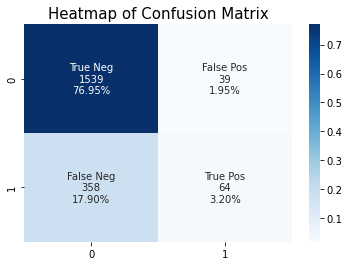

In [27]:
# Confusion matrix for accuracy
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), annot = labels ,fmt='', cmap='Blues')
plt.show()

In [28]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="gini", max_depth = 5)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1578
           1       0.80      0.36      0.50       422

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.84      0.85      0.82      2000

0.847


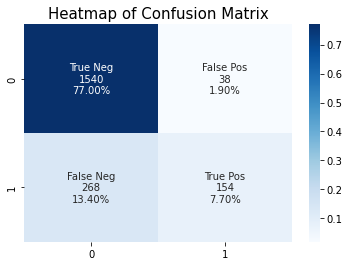

In [29]:
# Confusion matrix for accuracy
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), annot = labels ,fmt='', cmap='Blues')
plt.show()

In [30]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.77      0.45      0.57       422

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

0.8565


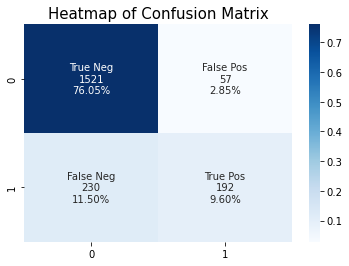

In [31]:
# Confusion matrix for accuracy
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), annot = labels ,fmt='', cmap='Blues')
plt.show()

In [32]:
#Using random forest as its accuracy is highest 
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)

In [33]:
# Function for prediction
def predict_churn(model,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary):
    x =np.zeros(len(X_1.columns)) # create zero numpy array, as input value for model
    # adding feature's value accorind to their column index
    x[0]=CustomerId
    x[1]=CreditScore
    x[2]=Geography
    x[3]=Age
    x[4]=Tenure
    x[5]=Balance
    x[6]=NumOfProducts
    x[7]=HasCrCard
    x[8]=IsActiveMember
    x[9]=EstimatedSalary
    # feature scaling
    x = scaler.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
    return model.predict([x])[0] # return the predicted value by train Random forest model


## Predictions

In [34]:
#Prediction 1 ----   Orignal_output = 1 , Predicted_output = 0  ---- model may predict some wrong as our accuracy is 85.6%
predict_churn(model=rfc ,CustomerId=15634602,CreditScore=619,Geography=0,Age=42,Tenure=2,Balance=0.0,NumOfProducts=1,HasCrCard=1,IsActiveMember=1,EstimatedSalary=101348.88) 

0

In [35]:
#Prediction 2 ----   Orignal_output = 0 , Predicted_output = 0  
predict_churn(model=rfc ,CustomerId=15647311,CreditScore=608,Geography=2,Age=41,Tenure=1,Balance=83807.86,NumOfProducts=1,HasCrCard=0,IsActiveMember=1,EstimatedSalary=112542.58) 

0

In [36]:
#Prediction 3 ----   Orignal_output = 1, Predicted_output = 1  
predict_churn(model=rfc ,CustomerId=15619304,CreditScore=502,Geography=0,Age=42,Tenure=8,Balance=159660.80,NumOfProducts=3,HasCrCard=1,IsActiveMember=0,EstimatedSalary=113931.57) 

1

In [37]:
#Prediction 4 ----   Orignal_output = 0 , Predicted_output = 0  
predict_churn(model=rfc ,CustomerId=15701354,CreditScore=699,Geography=0,Age=39,Tenure=1,Balance=0.0,NumOfProducts=2,HasCrCard=0,IsActiveMember=0,EstimatedSalary=93826.63) 

0

In [38]:
#Prediction 5 ----   Orignal_output = 0 , Predicted_output = 0  
predict_churn(model=rfc ,CustomerId=15737888,CreditScore=850,Geography=2,Age=43,Tenure=2,Balance=125510.82,NumOfProducts=1,HasCrCard=1,IsActiveMember=1,EstimatedSalary=79084.10) 

0

In [39]:
#Prediction 6 ---- over a random data
predict_churn(model=rfc ,CustomerId=15737887,CreditScore=620,Geography=1,Age=22,Tenure=1,Balance=0,NumOfProducts=1,HasCrCard=0,IsActiveMember=0,EstimatedSalary=9084.10) 

0

In [40]:
#prediction 7 ---- over a random data
predict_churn(model=rfc ,CustomerId=15737881,CreditScore=220,Geography=1,Age=22,Tenure=1,Balance=0,NumOfProducts=3,HasCrCard=0,IsActiveMember=0,EstimatedSalary=9084.10) 

1

In [41]:
#prediction 8 ---- over a random data
predict_churn(model=rfc ,CustomerId=15737882,CreditScore=220,Geography=1,Age=22,Tenure=1,Balance=0,NumOfProducts=3,HasCrCard=0,IsActiveMember=0,EstimatedSalary=900084.10) 

1

In [43]:
predict_churn(model=rfc ,CustomerId=15737956,CreditScore=500,Geography=1,Age=22,Tenure=1,Balance=0,NumOfProducts=2,HasCrCard=1,IsActiveMember=0,EstimatedSalary=900004.10) 

0